#### PSNR (Peak Signal-to-Noise Ratio)
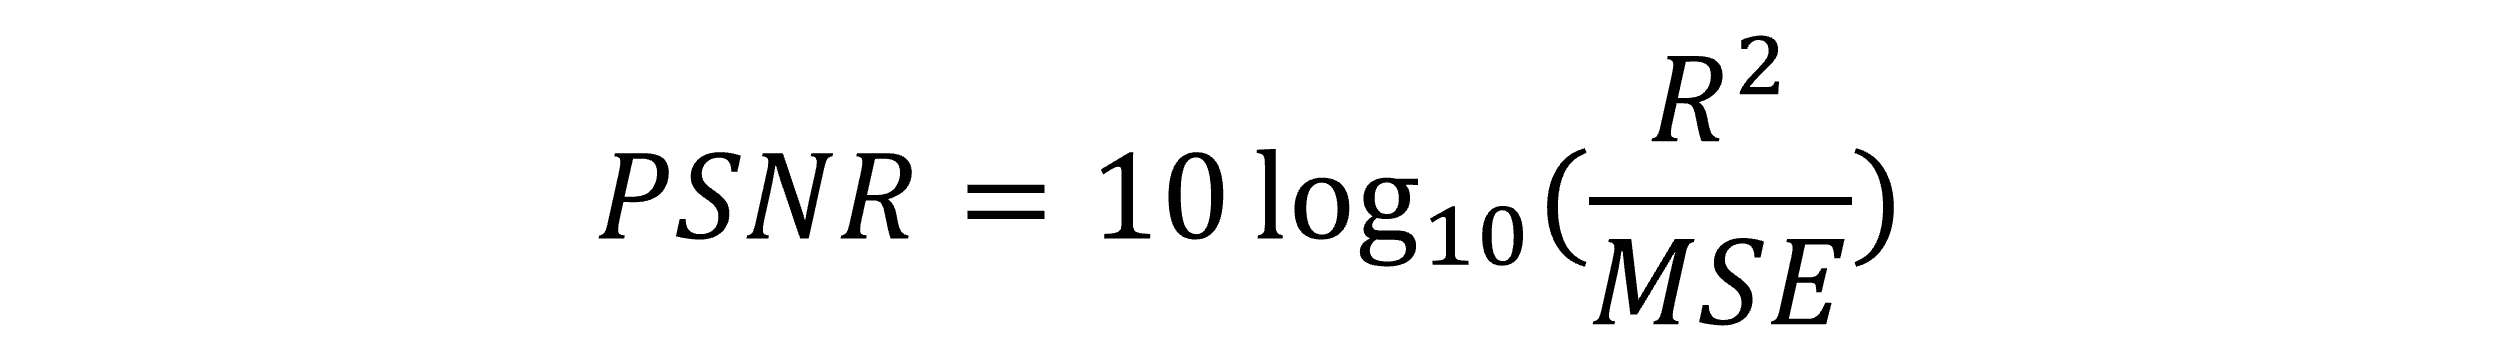
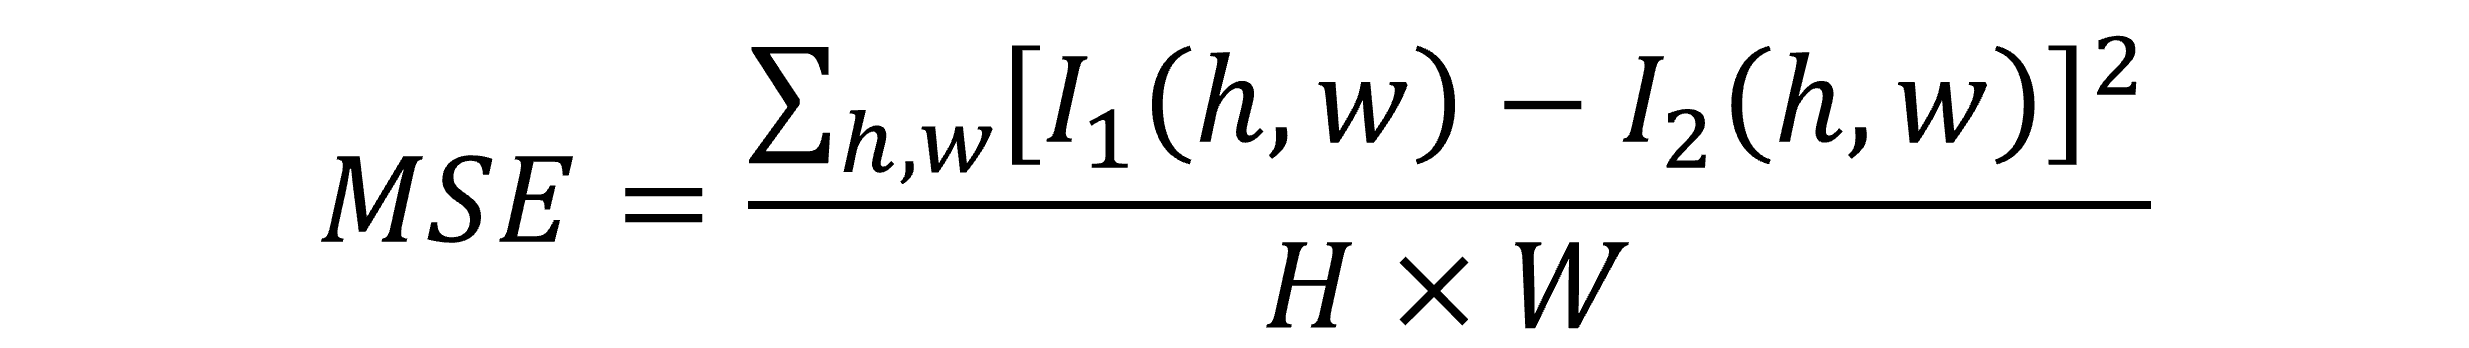
- 화질 손실량을 평가하기 위한 지표
- PSNR은 인간이 시각적으로 느끼는 품질의 차이가 아님. 따라서, 수치가 작더라도 사람 눈에는 좋아보일 수 있음 
- MSE가 분모로 들어감에 따라 MSE가 작을수록 값이 커짐
- R은 1개 픽셀이 가지고 있는 정보량

- <font size="4">*$R^2$과 같이 제곱이 쓰이 이유 (추측)*<font>
<font size="3"> Signal에서 데시벨 단위를 사용하는데, 데시벨의 수식이 아래와 같음.<font>
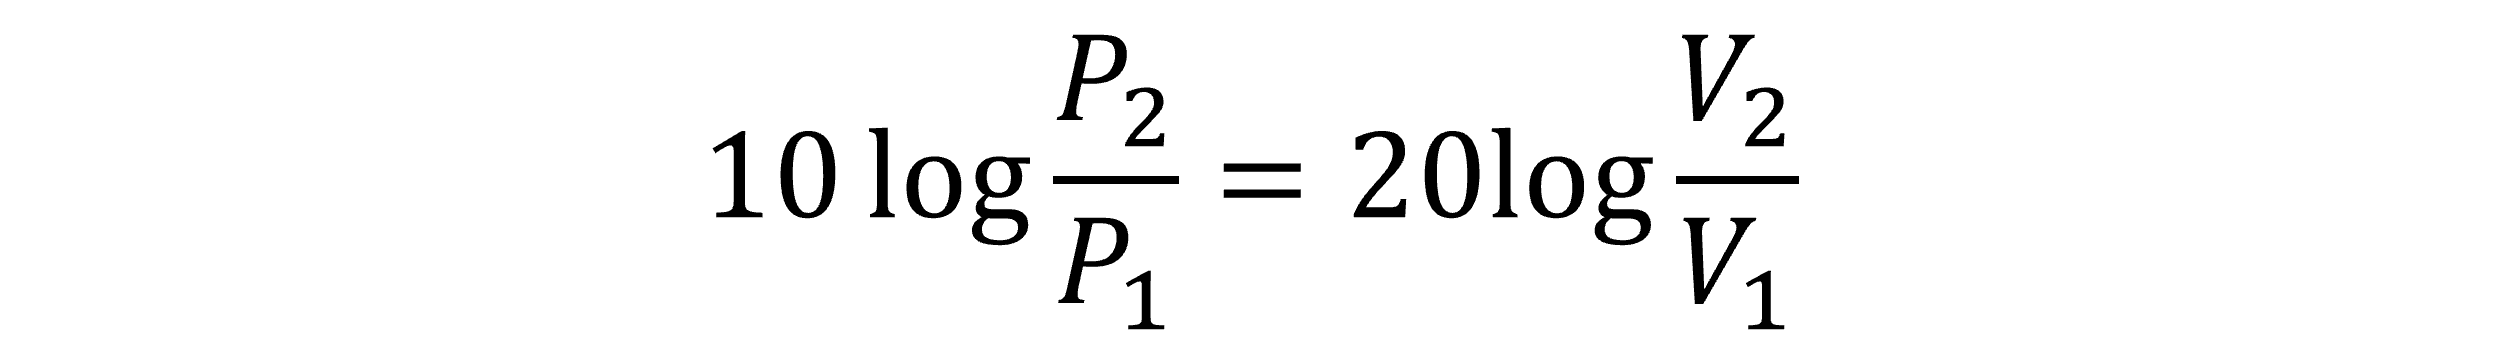
<font size="3">이런 형태와 비슷하게 만들기 위해 수식을 아래와 같이 쓴것이 아닐까??<font>
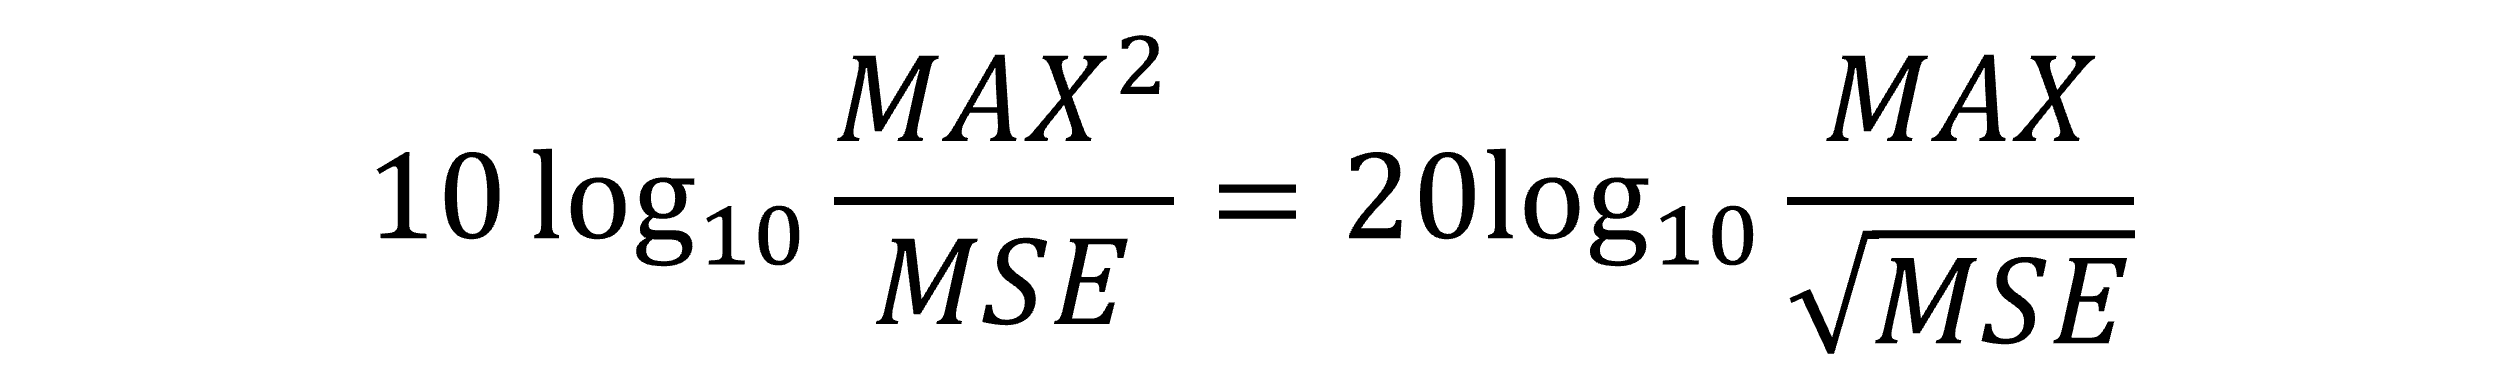

#### 사용해보기

In [38]:
import math
import os
import numpy as np
import cv2
import torchvision.transforms.functional as TF
from torchvision.io import read_image, ImageReadMode
from torchvision import transforms
from PIL import Image
from model import LPIENet

In [39]:
def psnr(img, img_blur):
    mse = np.mean((img - img_blur)**2)
    if(mse == 0):
        return 100
    R = 255.0
    psnr = 10 * math.log10(R**2/mse)
    return psnr

In [40]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop((540,960)),
    transforms.ToTensor(),
])

model = LPIENet(3, 3, [16, 32, 64], [32, 16])
model.load_state_dict(torch.load('best.pth'))
model.to(device)
img_blur = read_image('img_blur.png', mode = ImageReadMode.RGB)
img_blur = transform(img_blur).to(device)

result = model(img_blur.unsqueeze(0))
p = 1e-5
result = result.clip(0, 1 - p) # 이상치 값 clip


# result를 png이미지로 변경
result_image = TF.to_pil_image(result.squeeze().cpu())
print(result_image)
result_image.save('result_image.png')

<PIL.Image.Image image mode=RGB size=960x540 at 0x2241AEE2DC8>


In [41]:
img = cv2.imread('img.png')
img = cv2.resize(img, (960, 540))

img_blur = cv2.imread('img_blur.png')
img_blur = cv2.resize(img_blur, (960, 540))

value = psnr(img, img_blur)
print(f"PSNR value is {value} dB")


img = cv2.imread('img.png')
# 이미지 크기 가져오기
height, width = img.shape[:2]
# 새로운 이미지 크기 설정
new_width, new_height = 960, 540

# 결과 이미지가 center_crop된 이미지이므로, 이미지를 Center Crop하여 리사이즈
left = (width - new_width) // 2
top = (height - new_height) // 2
cropped_img = img[top:top + new_height, left:left + new_width]

result_image = cv2.imread('result_image.png')
value = psnr(cropped_img, result_image)
print(f"Model output's PSNR value is {value} dB")

PSNR value is 31.617399307985675 dB
Model output's PSNR value is 32.11829658685852 dB
